In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
d_1 = {'shtan': [0.38, 0.36, 0.35, 0.3, 0.35, 0.35, 0.35, 0.4, 0.3, 0.35], 'micrometr' : [0.37, 0.36, 0.365, 0.37, 0.37, 0.365, 0.37, 0.37, 0.37, 0.37]}

d20 = {'Vdel' : [117, 86, 71, 61, 56, 51, 129, 44, 40, 34], 'Idel' : [273.24, 201.11, 165.13, 142.75, 129.29, 119.49, 300.35, 103.03, 93.01, 78.29]}
d30 = {'Vdel' : [149, 110, 94, 84, 75, 69, 65, 60, 58,55], 'Idel' : [220.37, 170.08, 144.46, 128.66, 115.12, 105.04, 100.07, 93.02, 89.04, 84.96]}
d50 = {'Vdel' : [146, 138, 129, 123, 118, 104, 99, 93, 88, 84, 80], 'Idel' : [136.67, 128.60, 120.56, 114.85, 104.18, 97.40, 92.16, 87.05, 81.63, 78.61, 74.26]}

r20 = 2.2215
r30 = 3.3128
r50 = 5.3952

d20_2 = {'Vdel' : [144, 128, 112, 107, 100, 93, 86, 80, 71, 66], 'Idel' : [196.56, 174.09, 159.63, 145.92, 136.69, 126.46, 116.81, 109.44, 96.30, 89.55]}
d30_2 = {'Vdel' : [146, 138, 133, 126, 118, 111, 92, 90, 87, 84], 'Idel' : [152.95, 144.27, 138.97, 131.65, 123.27, 115.82, 96.83, 94.46, 90.8, 87.92]}
d50_2 = {'Vdel' : [149, 145.5, 141, 136, 132, 126, 123, 117, 114, 109, 103], 'Idel' : [107.56, 104.6, 101.75, 97.57, 94.73, 90.94, 88.27, 84.26, 81.94, 78.66,73.95]}

v_1 = 0.75
V_q = 150
r_a = 1.4

In [24]:
df_1 = pd.DataFrame(data=d_1)

df20 = pd.DataFrame(data=d20)
df30 = pd.DataFrame(data=d30)
df50 = pd.DataFrame(data=d50)

df20_2 = pd.DataFrame(data=d20_2)
df30_2 = pd.DataFrame(data=d30_2)
df50_2 = pd.DataFrame(data=d50_2)


In [25]:
# 150 deleniy == 0.75 V
V_trans = v_1/V_q

In [26]:
df20['V'] = df20['Vdel'] * V_trans
df30['V'] = df30['Vdel'] * V_trans
df50['V'] = df50['Vdel'] * V_trans

df20_2['V'] = df20_2['Vdel'] * V_trans
df30_2['V'] = df30_2['Vdel'] * V_trans
df50_2['V'] = df50_2['Vdel'] * V_trans

In [34]:
R_v = v_1/(0.15*0.001)

In [37]:
df20_2['R'] = (df20_2['V'] - r_a*df20_2['Idel']*0.001)/(0.001*df20_2['Idel'])
df30_2['R'] = (df30_2['V'] - r_a*df30_2['Idel']*0.001)/(0.001*df30_2['Idel'])
df50_2['R'] = (df50_2['V'] - r_a*df50_2['Idel']*0.001)/(0.001*df50_2['Idel'])

df20['R'] = (df20['V']*R_v)/(df20['Idel']*0.001*R_v - df20['V'])
df30['R'] = (df30['V']*R_v)/(df30['Idel']*0.001*R_v - df30['V'])
df50['R'] = (df50['V']*R_v)/(df50['Idel']*0.001*R_v - df50['V'])

In [60]:
r20_1 = df20['R'].mean()
r30_1 = df30['R'].mean()
r50_1 = df50['R'].mean()

r20_2 = df20_2['R'].mean()
r30_2 = df30_2['R'].mean()
r50_2 = df50_2['R'].mean()

r20 = 2.2215
r30 = 3.3128
r50 = 5.3952


In [55]:
r20_2

2.25563834625372

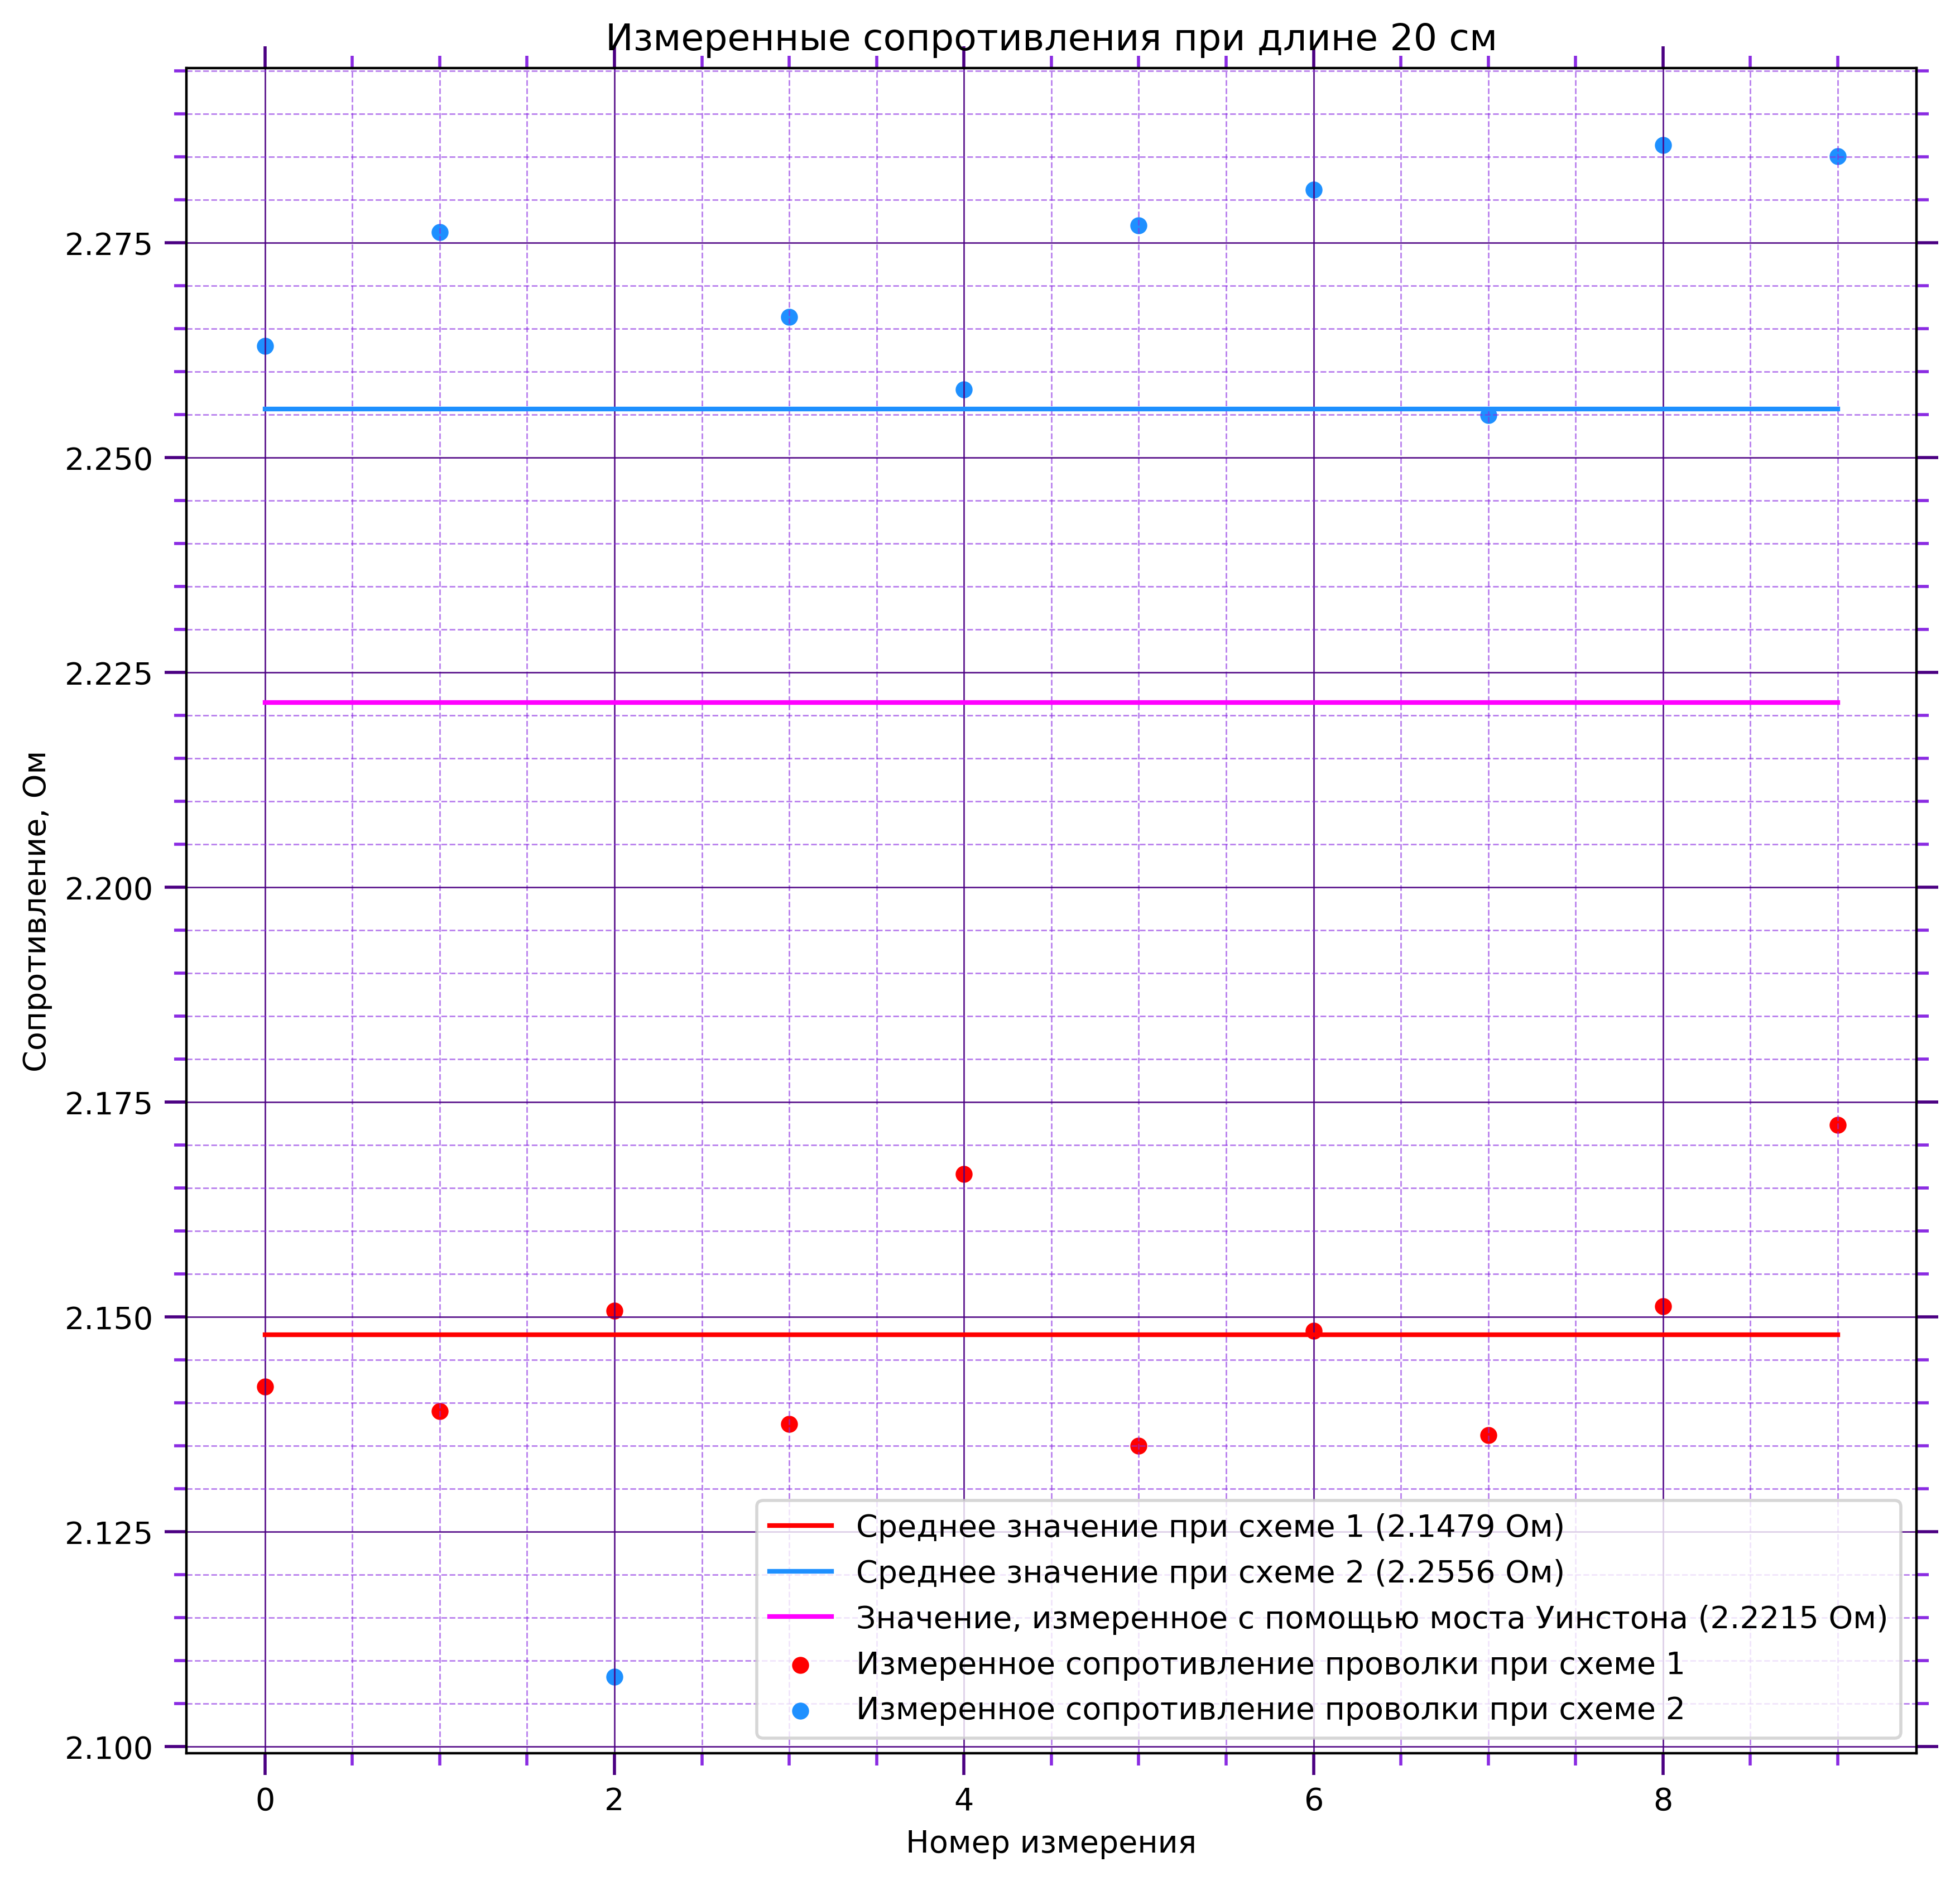

In [56]:
fig = plt.figure(figsize=(10, 10), dpi=400)

plt.scatter( [i for i in range(len(df20['R']))], df20['R'], s = 20, color = 'red', label = 'Измеренное сопротивление проволки при схеме 1')
plt.scatter( [i for i in range(len(df20_2['R']))], df20_2['R'], s = 20, color = 'dodgerblue', label = 'Измеренное сопротивление проволки при схеме 2')

plt.plot( [i for i in range(len(df20['R']))], [r20_1 for i in range(len(df20['R']))], color = 'red', label = ('Среднее значение при схеме 1 (2.1479 Ом)'))
plt.plot( [i for i in range(len(df20_2['R']))], [r20_2 for i in range(len(df20_2['R']))], color = 'dodgerblue', label = 'Среднее значение при схеме 2 (2.2556 Ом)')
plt.plot( [i for i in range(len(df20['R']))], [r20 for i in range(len(df20['R']))], color = 'magenta', label = 'Значение, измеренное с помощью моста Уинстона (2.2215 Ом)')

#plt.xscale('log')

#plt.xlim(np.min(np.array(x)), np.max(np.array(x)))
#plt.ylim(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ) )

#plt.xticks(np.arange(np.min(np.array(x)), np.max(np.array(x)), 10))
#plt.yticks(np.arange(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ), 0.2))
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 7, width =1, color = 'indigo', zorder = 1, grid_color ='indigo', grid_alpha =0.9, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 4, width =1, color = 'blueviolet', zorder = 1,  grid_color ='blueviolet', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.ylabel('Сопротивление, Ом')
plt.xlabel('Номер измерения')

plt.title('Измеренные сопротивления при длине 20 см', loc = 'center')

plt.legend()





plt.savefig('111_r20.png', dpi = 450)

In [61]:
r30_2

3.3786616091267696

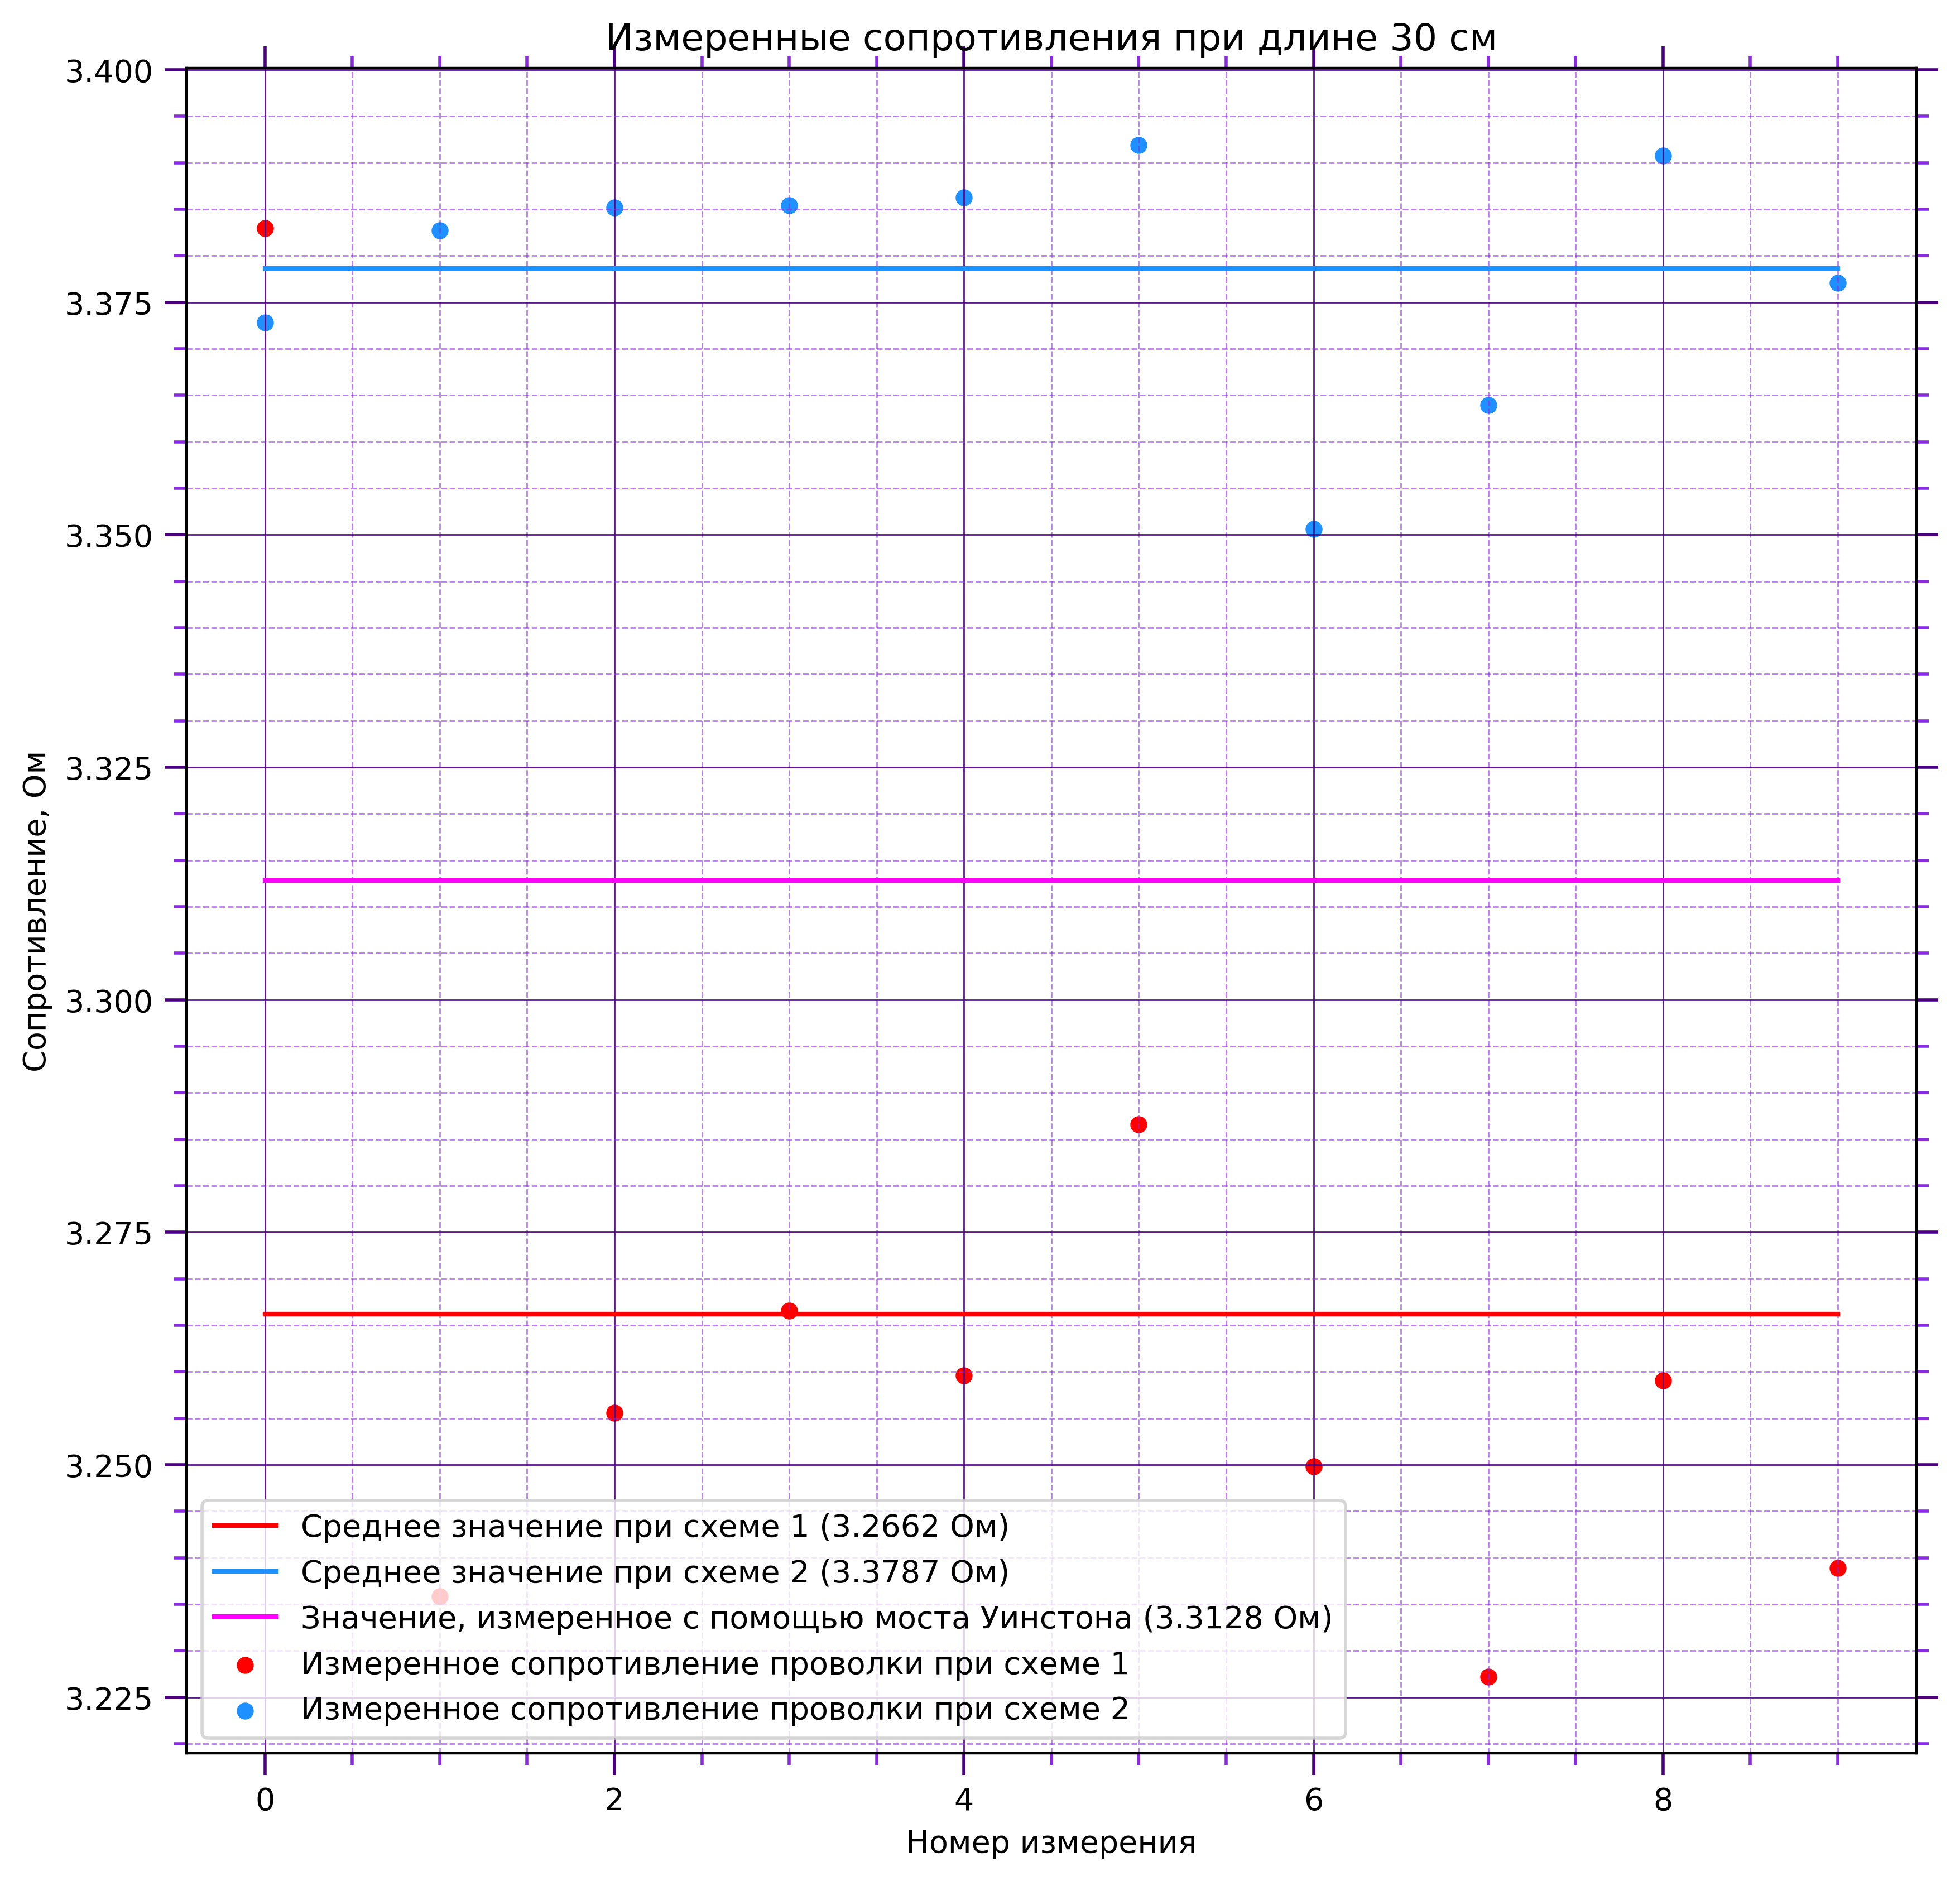

In [62]:
fig = plt.figure(figsize=(10, 10), dpi=400)

plt.scatter( [i for i in range(len(df30['R']))], df30['R'], s = 20, color = 'red', label = 'Измеренное сопротивление проволки при схеме 1')
plt.scatter( [i for i in range(len(df30_2['R']))], df30_2['R'], s = 20, color = 'dodgerblue', label = 'Измеренное сопротивление проволки при схеме 2')

plt.plot( [i for i in range(len(df30['R']))], [r30_1 for i in range(len(df30['R']))], color = 'red', label = ('Среднее значение при схеме 1 (3.2662 Ом)'))
plt.plot( [i for i in range(len(df30_2['R']))], [r30_2 for i in range(len(df30_2['R']))], color = 'dodgerblue', label = 'Среднее значение при схеме 2 (3.3787 Ом)')
plt.plot( [i for i in range(len(df30['R']))], [r30 for i in range(len(df30['R']))], color = 'magenta', label = 'Значение, измеренное с помощью моста Уинстона (3.3128 Ом)')

#plt.xscale('log')

#plt.xlim(np.min(np.array(x)), np.max(np.array(x)))
#plt.ylim(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ) )

#plt.xticks(np.arange(np.min(np.array(x)), np.max(np.array(x)), 10))
#plt.yticks(np.arange(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ), 0.2))
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 7, width =1, color = 'indigo', zorder = 1, grid_color ='indigo', grid_alpha =0.9, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 4, width =1, color = 'blueviolet', zorder = 1,  grid_color ='blueviolet', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.ylabel('Сопротивление, Ом')
plt.xlabel('Номер измерения')

plt.title('Измеренные сопротивления при длине 30 см', loc = 'center')

plt.legend()





plt.savefig('111_r30.png', dpi = 450)

In [64]:
r50_2

5.548493973292621

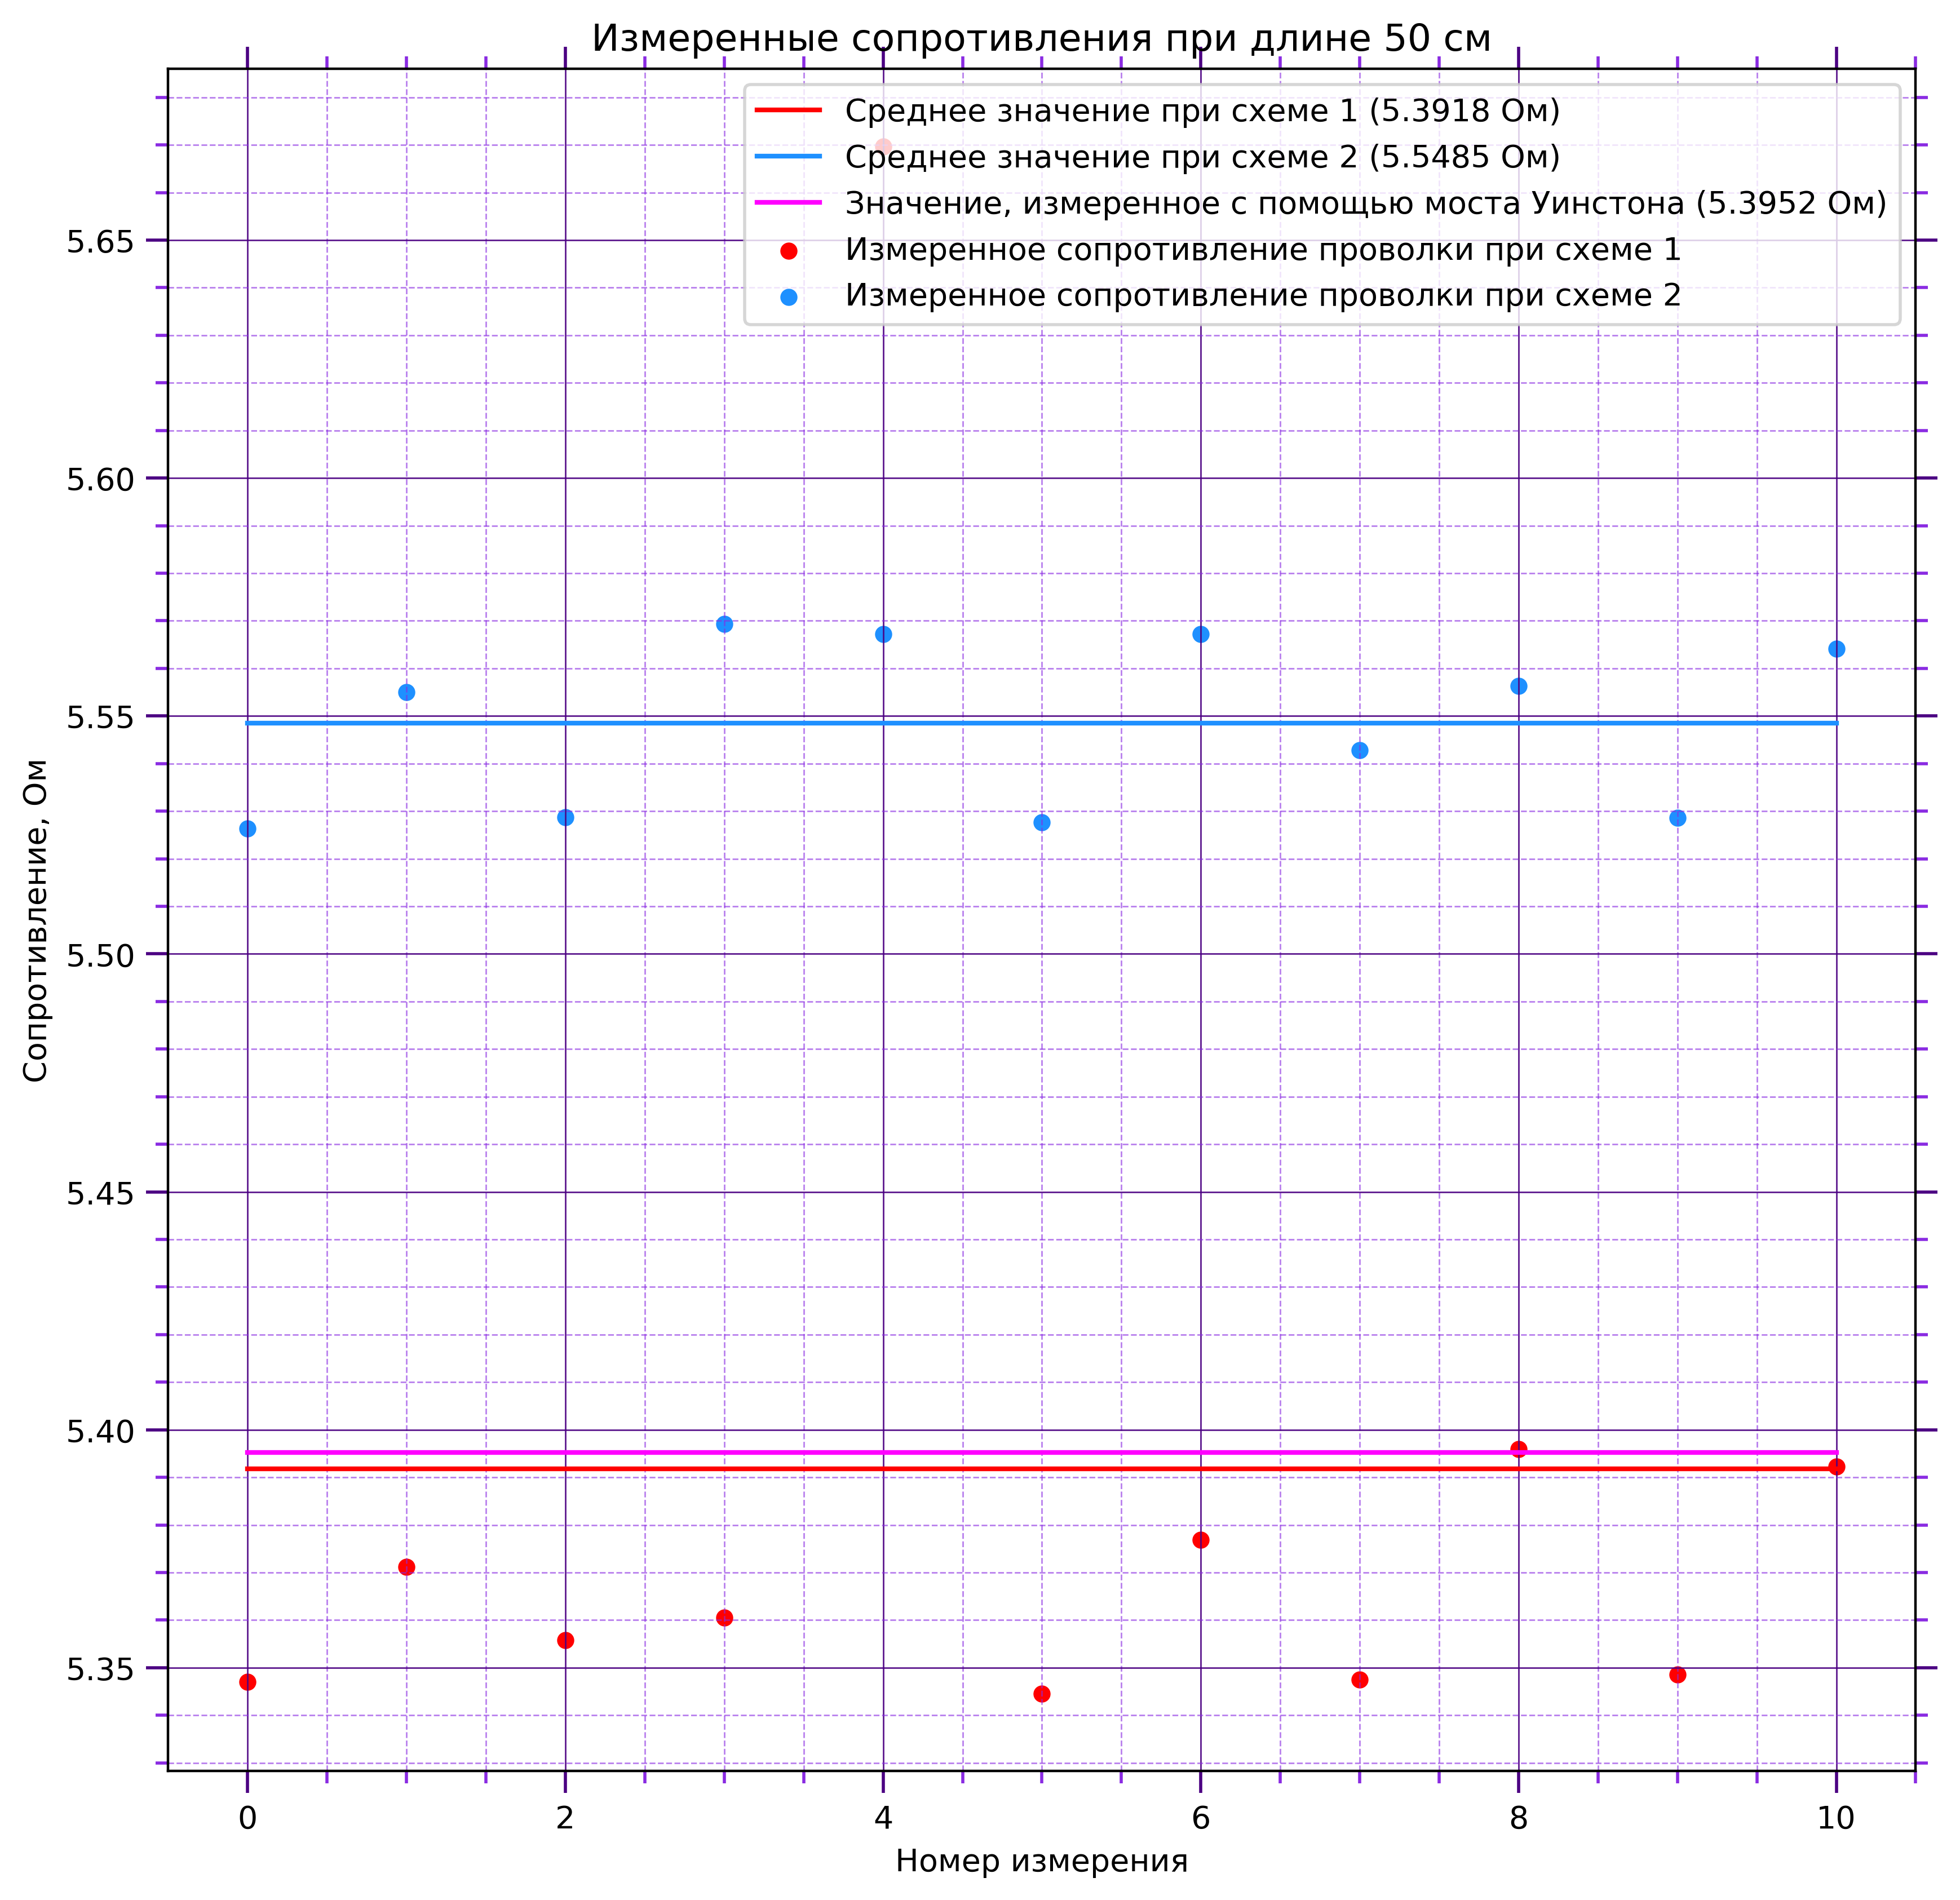

In [65]:
fig = plt.figure(figsize=(10, 10), dpi=400)

plt.scatter( [i for i in range(len(df50['R']))], df50['R'], s = 20, color = 'red', label = 'Измеренное сопротивление проволки при схеме 1')
plt.scatter( [i for i in range(len(df50_2['R']))], df50_2['R'], s = 20, color = 'dodgerblue', label = 'Измеренное сопротивление проволки при схеме 2')

plt.plot( [i for i in range(len(df50['R']))], [r50_1 for i in range(len(df50['R']))], color = 'red', label = ('Среднее значение при схеме 1 (5.3918 Ом)'))
plt.plot( [i for i in range(len(df50_2['R']))], [r50_2 for i in range(len(df50_2['R']))], color = 'dodgerblue', label = 'Среднее значение при схеме 2 (5.5485 Ом)')
plt.plot( [i for i in range(len(df50['R']))], [r50 for i in range(len(df50['R']))], color = 'magenta', label = 'Значение, измеренное с помощью моста Уинстона (5.3952 Ом)')

#plt.xscale('log')

#plt.xlim(np.min(np.array(x)), np.max(np.array(x)))
#plt.ylim(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ) )

#plt.xticks(np.arange(np.min(np.array(x)), np.max(np.array(x)), 10))
#plt.yticks(np.arange(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ), 0.2))
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 7, width =1, color = 'indigo', zorder = 1, grid_color ='indigo', grid_alpha =0.9, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 4, width =1, color = 'blueviolet', zorder = 1,  grid_color ='blueviolet', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.ylabel('Сопротивление, Ом')
plt.xlabel('Номер измерения')

plt.title('Измеренные сопротивления при длине 50 см', loc = 'center')

plt.legend()





plt.savefig('111_r50.png', dpi = 450)

In [68]:
import math

In [69]:
sig1 = (1/len(df_1['shtan'])) * math.sqrt(sum([((i - df_1['shtan'].mean())**2) for i in df_1['shtan']]))

In [70]:
sig1

0.009214119599831556

In [71]:
sig2 = (1/len(df_1['micrometr'])) * math.sqrt(sum([((i - df_1['micrometr'].mean())**2) for i in df_1['micrometr']]))

In [72]:
sig2

0.0010488088481701526

In [74]:
df_1['micrometr'].mean()

0.36800000000000005

In [73]:
df_1['shtan'].mean()

0.349

In [75]:
0.05*0.75

0.037500000000000006

In [76]:
from sklearn.linear_model import LinearRegression

In [79]:
import numpy as np

In [93]:
model1 = LinearRegression()
x = np.array(df50['Idel'])
y = np.array(df50['V'])
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
model1.fit(x, y)

LinearRegression()

In [94]:
model2 = LinearRegression()
x = np.array(df50_2['Idel'])
y = np.array(df50_2['V'])
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
model2.fit(x, y)

LinearRegression()

In [95]:
x1 = np.array(df50['Idel'])
x2 = np.array(df50_2['Idel'])
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)

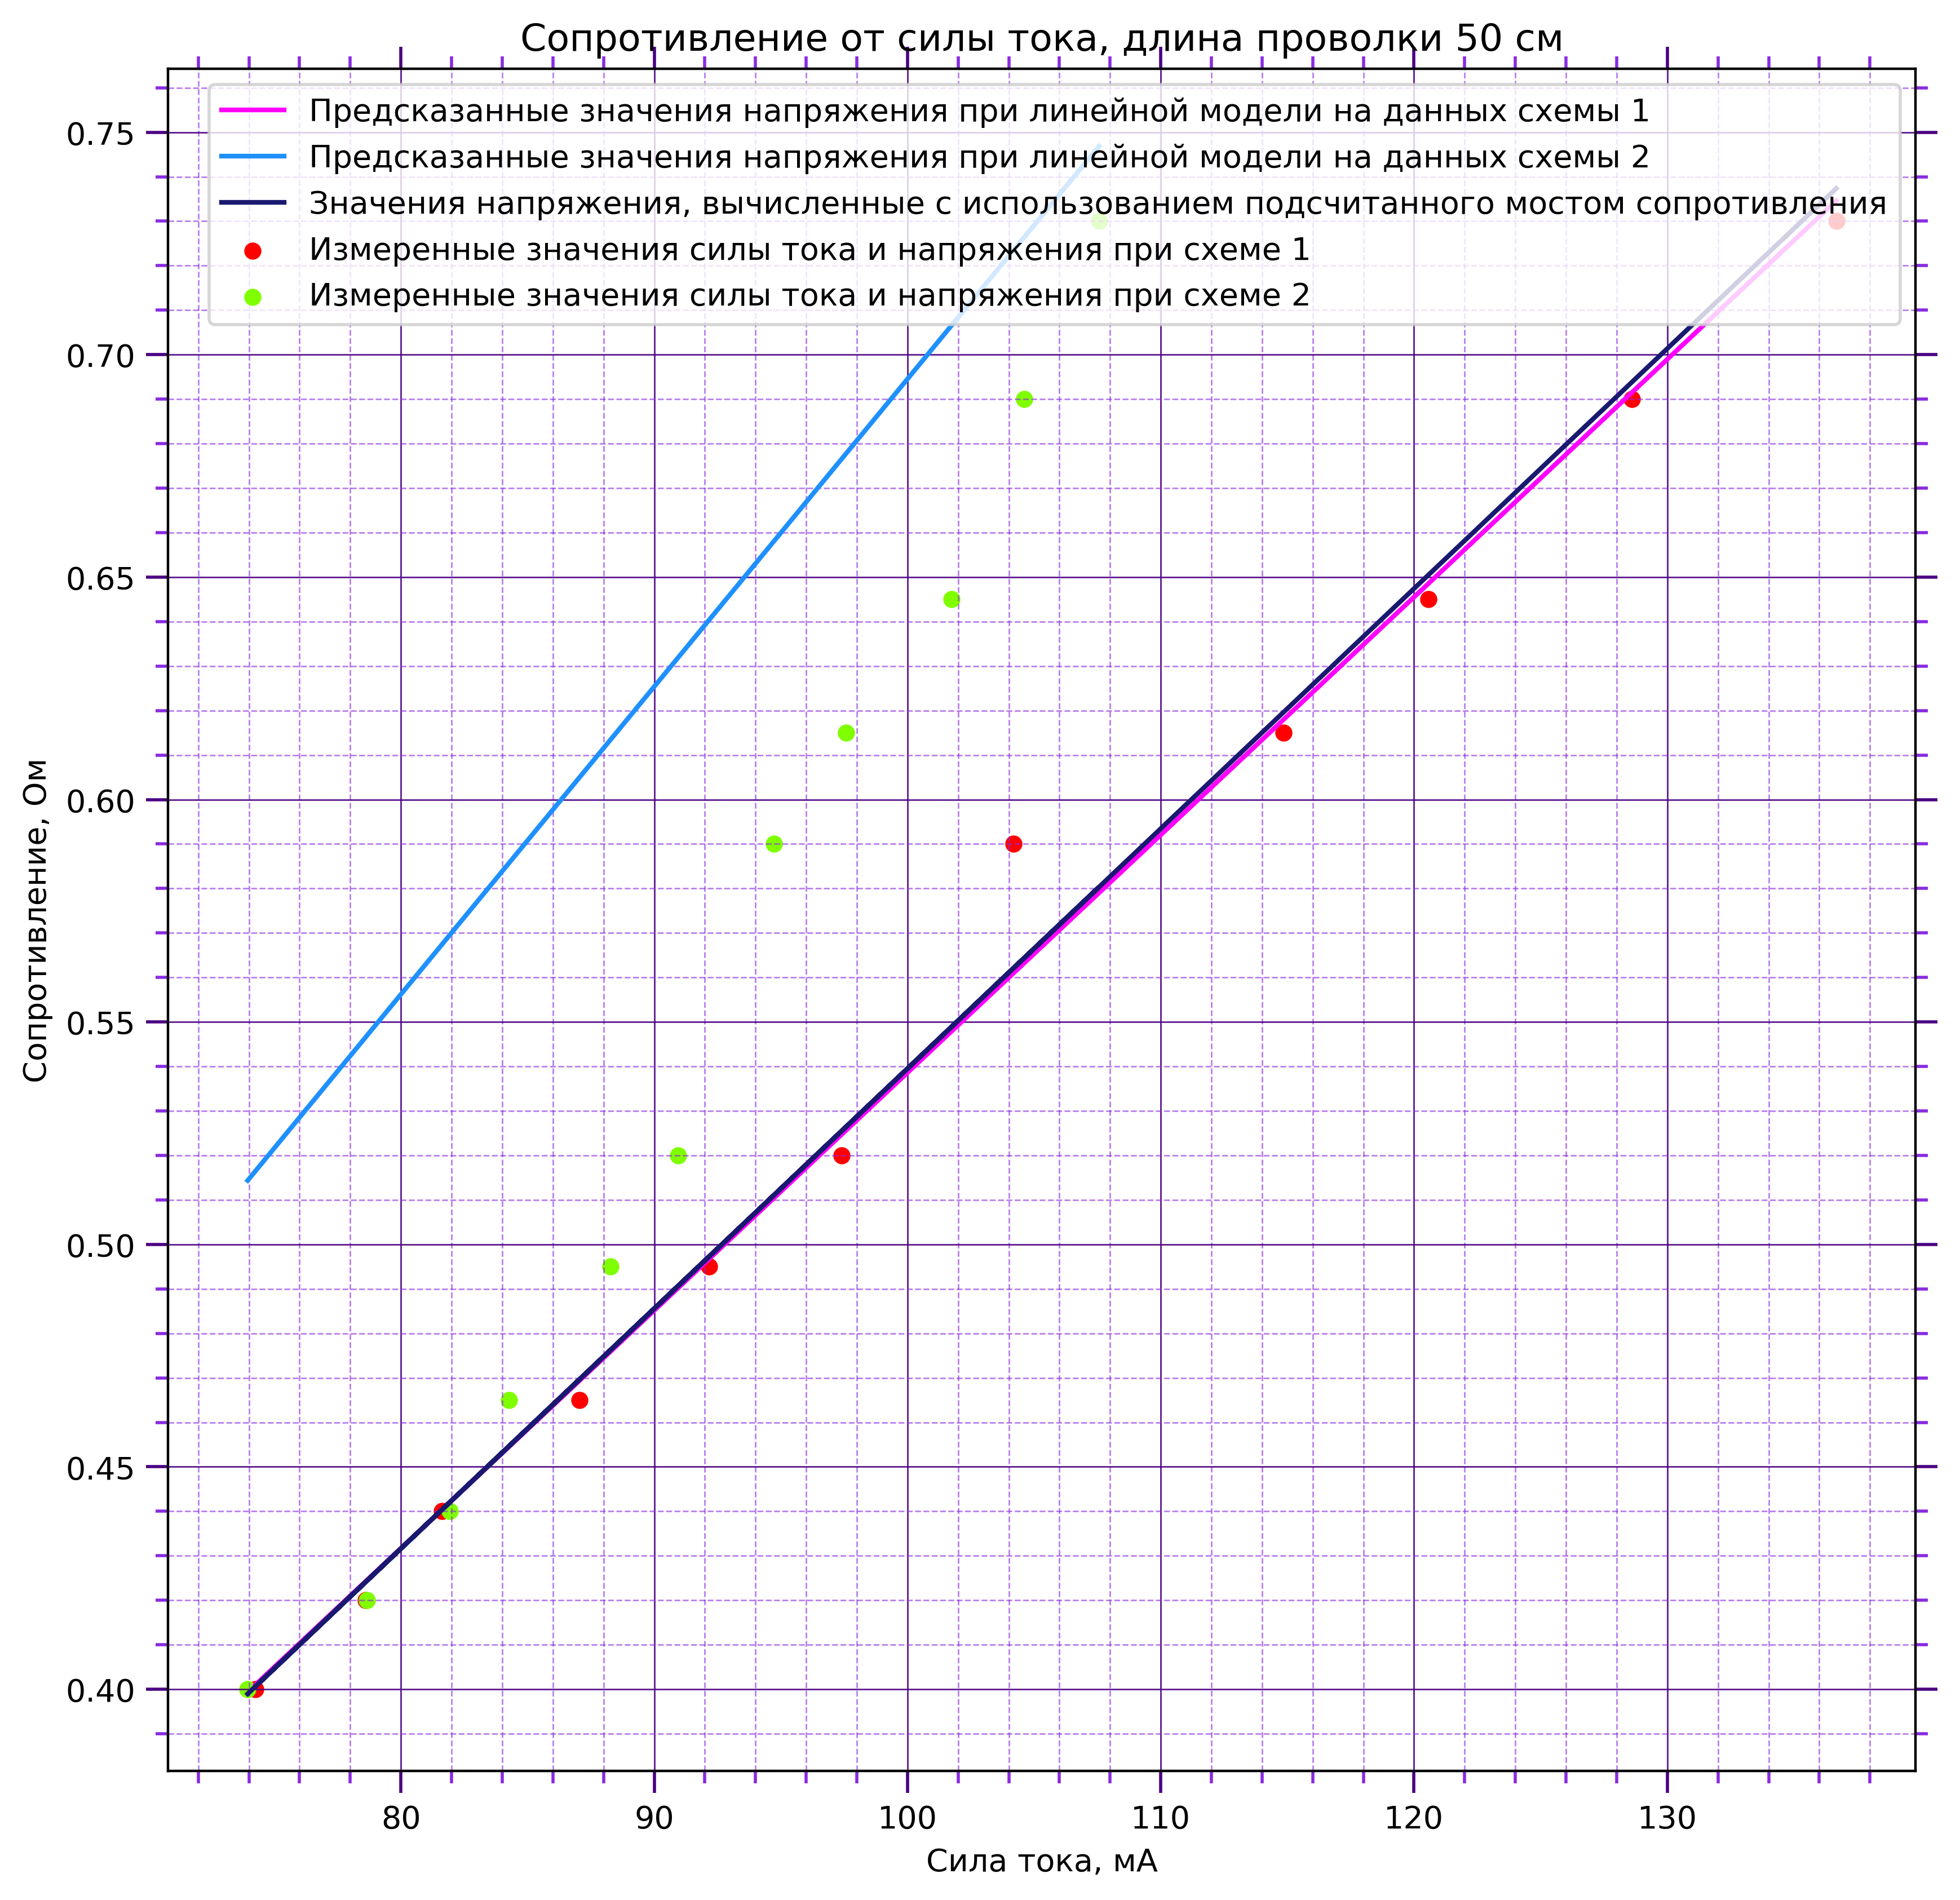

In [97]:
V_g1 = model1.predict(x1)
V_g2 = model2.predict(x2)
fig = plt.figure(figsize=(10, 10), dpi=400)

plt.scatter( x1, df50['V'], s = 20, color = 'red', label = 'Измеренные значения силы тока и напряжения при схеме 1')
plt.scatter( x2, df50['V'], s = 20, color = 'chartreuse', label = 'Измеренные значения силы тока и напряжения при схеме 2')

plt.plot(x1, V_g1, color = 'magenta', label = 'Предсказанные значения напряжения при линейной модели на данных схемы 1')
plt.plot(x2, V_g2, color = 'dodgerblue', label = 'Предсказанные значения напряжения при линейной модели на данных схемы 2')

x = np.concatenate([x1,x2])

plt.plot(x, [0.001*i*r50 for i in x], color = 'midnightblue', label = 'Значения напряжения, вычисленные с использованием подсчитанного мостом сопротивления')

#plt.xscale('log')

#plt.xlim(np.min(np.array(x)), np.max(np.array(x)))
#plt.ylim(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ) )

#plt.xticks(np.arange(np.min(np.array(x)), np.max(np.array(x)), 10))
#plt.yticks(np.arange(np.min(np.array(y)), ( np.max(np.array(y) ) + 0.1 ), 0.2))
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 7, width =1, color = 'indigo', zorder = 1, grid_color ='indigo', grid_alpha =0.9, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 4, width =1, color = 'blueviolet', zorder = 1,  grid_color ='blueviolet', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.ylabel('Сопротивление, Ом')
plt.xlabel('Сила тока, мА')

plt.title('Сопротивление от силы тока, длина проволки 50 см', loc = 'center')

plt.legend()





plt.savefig('111_r50ui.png', dpi = 450)

In [109]:
#погешности
 
    
U1 = df20['V']
I1 = df20['Idel']
L1 = [0.2 for i in df20['V']]
D1 = df_1['micrometr']*0.001
pi = 3.141592653589793
summdf20 = 0

for i in range(len(U1)):
    deltaI = ((pi*(D1[i]**2))/(4*L1[i])) * ((0.001*I1[i]*R_v - U1[i])*R_v + U1[i]*R_v )/( (0.001*I1[i]*R_v - U1[i])**2 )
    deltaU = ((pi*(D1[i]**2))/(4*L1[i])) * (-1*U1[i]*R_v*R_v)/((0.001*I1[i]*R_v - U1[i])**2)
    deltaD = ((U1[i]*R_v)/(I1[i]*0.001*R_v - U1[i])) * ((pi*(D1[i]))/(2*L1[i]))
    deltaL = ((U1[i]*R_v)/(I1[i]*0.001*R_v - U1[i])) * ((pi*(D1[i]**2))/(4*(L1[i]**2)))
    summdf20 = (((deltaI*0.001*0.01)**2) + ((deltaU*0.01125)**2) + ((deltaD*0.00001)**2) + ((deltaL*0.001) **2)) + summdf20
print(summdf20**0.5)

3.8165219964264e-07


In [108]:
0.015*0.75

0.01125

In [105]:
R_ud_1 = 0
temp1 = r20_1 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2 )/ (4*0.2)
temp2 = r30_1 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2) / (4*0.3)
temp3 = r50_1 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2)/ (4*0.5)
R_ud_1 = (temp1 +temp2 + temp3) / 3

In [106]:
R_ud_1

1.1490812175129027e-06

In [111]:
#погешности
 
    
U1 = df20_2['V']
I1 = df20_2['Idel']
L1 = [0.2 for i in df20_2['V']]
D1 = df_1['micrometr']*0.001
pi = 3.141592653589793
summdf201 = 0

for i in range(len(U1)):
    deltaI = ((pi*(D1[i]**2))/(4*L1[i])) * ((-1*U1[i])/(0.001*0.001*I1[i]*I1[i]))
    deltaU = ((pi*(D1[i]**2))/(4*L1[i]*I1[i]*0.001))
    deltaD = ((U1[i] - I1[i]*0.001*r_a)/(I1[i]*0.001)) * ((pi*(D1[i]))/(2*L1[i]))
    deltaL = ((U1[i] - I1[i]*0.001*r_a)/(I1[i]*0.001)) * ((pi*(D1[i]**2))/(4*(L1[i]**2)))
    summdf201 = (((deltaI*0.001*0.01)**2) + ((deltaU*0.01125)**2) + ((deltaD*0.00001)**2) + ((deltaL*0.001) **2)) + summdf201
print(summdf201**0.5)

2.5761676645695677e-07


In [112]:
R_ud_2 = 0
temp1 = r20_2 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2 )/ (4*0.2)
temp2 = r30_2 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2) / (4*0.3)
temp3 = r50_2 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2)/ (4*0.5)
R_ud_2 = (temp1 +temp2 + temp3) / 3

In [113]:
R_ud_2

1.1925771681406776e-06

In [114]:
R_ud = 0
temp1 = r20 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2 )/ (4*0.2)
temp2 = r30 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2) / (4*0.3)
temp3 = r50 * pi *((np.mean(np.array(D1).reshape(-1,1))) **2)/ (4*0.5)
R_ud = (temp1 +temp2 + temp3) / 3

In [115]:
R_ud

1.1678722250165307e-06

In [116]:
dchis = np.mean(np.array(D1).reshape(-1,1))

In [117]:
dchis

0.000368

In [118]:
mostpog = math.sqrt(3*((pi*dchis*dchis*0.0001/(4*0.2)) ** 2) + (r20*pi*0.000001*dchis*0.5/0.2)**2 + (r20*pi*0.001*dchis*dchis/(0.2*0.2*4))**2 +(r30*pi*0.000001*dchis*0.5/0.2)**2 + (r30*pi*0.001*dchis*dchis/(0.2*0.2*4))**2 + (r50*pi*0.000001*dchis*0.5/0.2)**2 + (r50*pi*0.001*dchis*dchis/(0.2*0.2*4))**2 )

In [119]:
mostpog

2.6350921836476948e-08

In [122]:
(abs(1.1*(10**(-6)) - 1.2*(10**(-6))))/(1.1*(10**(-6)))*100

9.09090909090908